**Problem1-Leetcode#200-Number of Islands-Medium**

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

 

- Example 1:

Input: grid = [\
  ["1","1","1","1","0"],\
  ["1","1","0","1","0"],\
  ["1","1","0","0","0"],\
  ["0","0","0","0","0"]\
]

Output: 1
- Example 2:

Input: grid = [\
  ["1","1","0","0","0"],\
  ["1","1","0","0","0"],\
  ["0","0","1","0","0"],\
  ["0","0","0","1","1"]\
]

Output: 3
 

- Constraints:

    - m == grid.length
    - n == grid[i].length

In [ ]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid:
            return 0

        r = len(grid)
        c = len(grid[0])

        def dfs(i, j):
            if i < 0 or i >= r or j < 0 or j >= c or grid[i][j] != '1':
                return
            grid[i][j] = '0'
            dfs(i + 1, j)
            dfs(i - 1, j)
            dfs(i, j + 1)
            dfs(i, j - 1)

        num_isl = 0
        for i in range(r):
            for j in range(c):
                if grid[i][j] == '1':
                    num_isl += 1
                    dfs(i, j)
        return num_isl

**Problem2-Leetcode#695-Max Area of Islands-Medium**

You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected\
4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

The area of an island is the number of cells with a value 1 in the island.

Return the maximum area of an island in grid. If there is no island, return 0.

 

- Example 1:
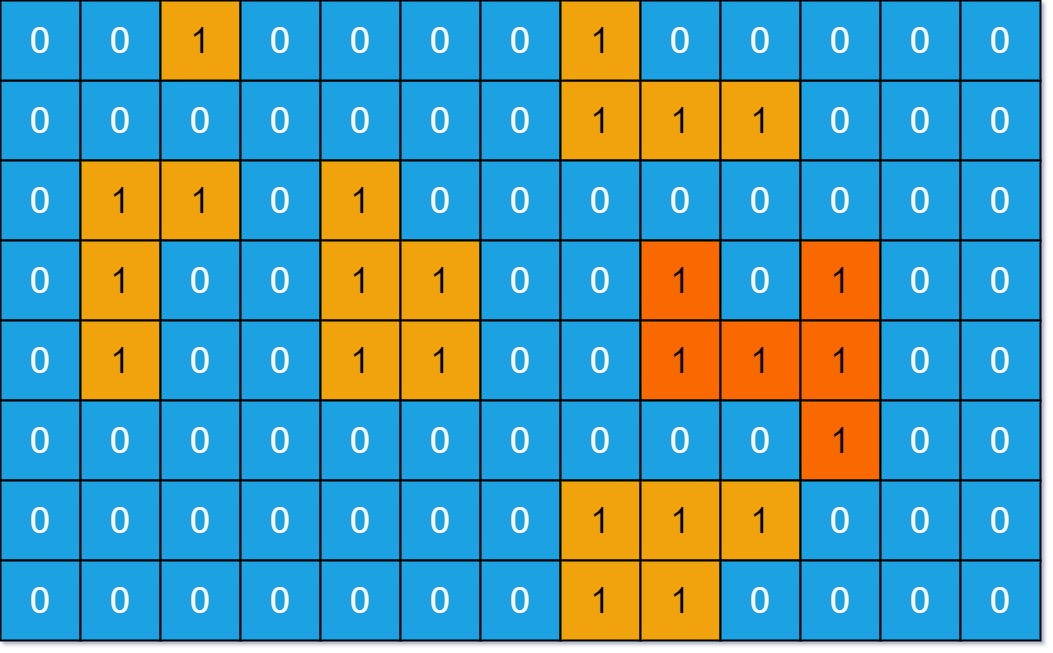
    - Input: grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]
    - Output: 6
    - Explanation: The answer is not 11, because the island must be connected 4-directionally.


- Example 2:

    - Input: grid = [[0,0,0,0,0,0,0,0]]
    - Output: 0
 

- Constraints:

    - m == grid.length
    - n == grid[i].length
    - 1 <= m, n <= 50
    - grid[i][j] is either 0 or 1.

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        if not grid:
            return 0

        rows = len(grid)
        col = len(grid[0])
        visit = set()

        def dfs(r, c, grid):
            if (r < 0 or c < 0 or r >= rows or c >= col or grid[r][c] == 0 or (r, c) in visit): 
                # r in range rows or c in range col
                return 0

            visit.add((r, c))
            directions = [[0, 1], [1, 0], [-1, 0], [0, -1]]
            count = 1
            for d in directions:
                dr, dc = r + d[0], c + d[1]
                count = count + dfs(dr, dc, grid)
            return count

        area = 0

        for i in range(rows):
            for j in range(col):
                if grid[i][j] == 1 and (i, j) not in visit:
                    area = max(area, dfs(i, j, grid))
        return area


**Problem3-Leetcode#1091. Shortest Path in Binary Matrix-Medium**

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

- All the visited cells of the path are 0.
- All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).
The length of a clear path is the number of visited cells of this path.

 

- Example 1:

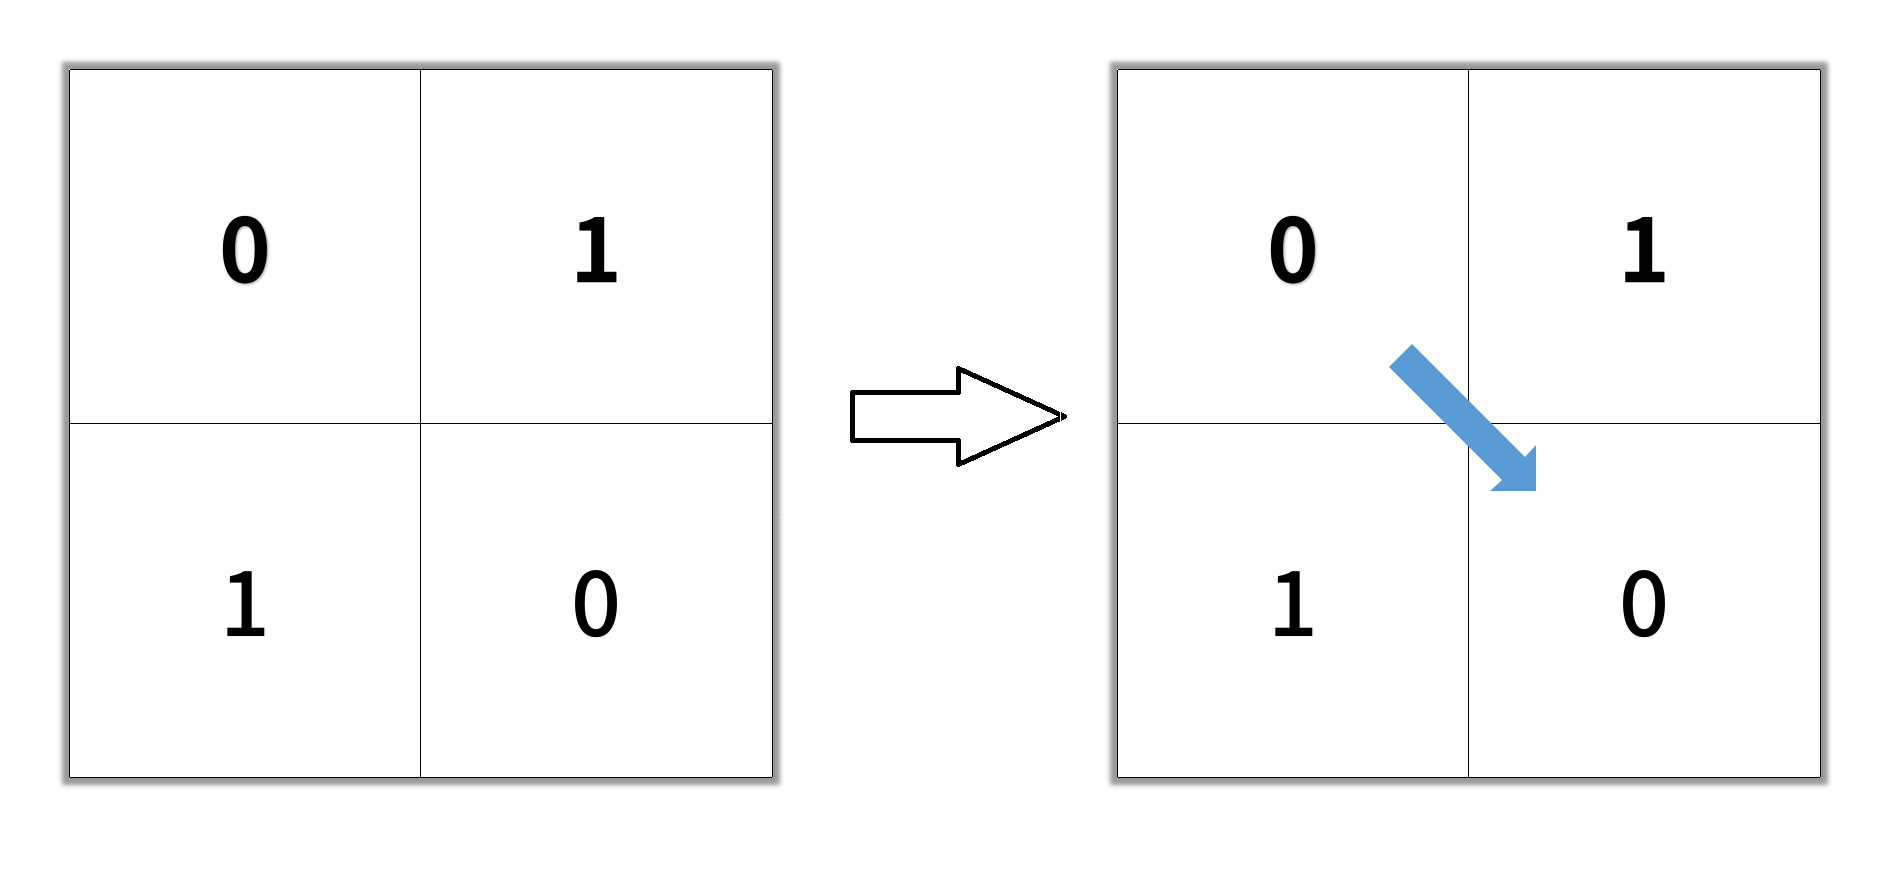

    - Input: grid = [[0,1],[1,0]]
    - Output: 2
- Example 2:

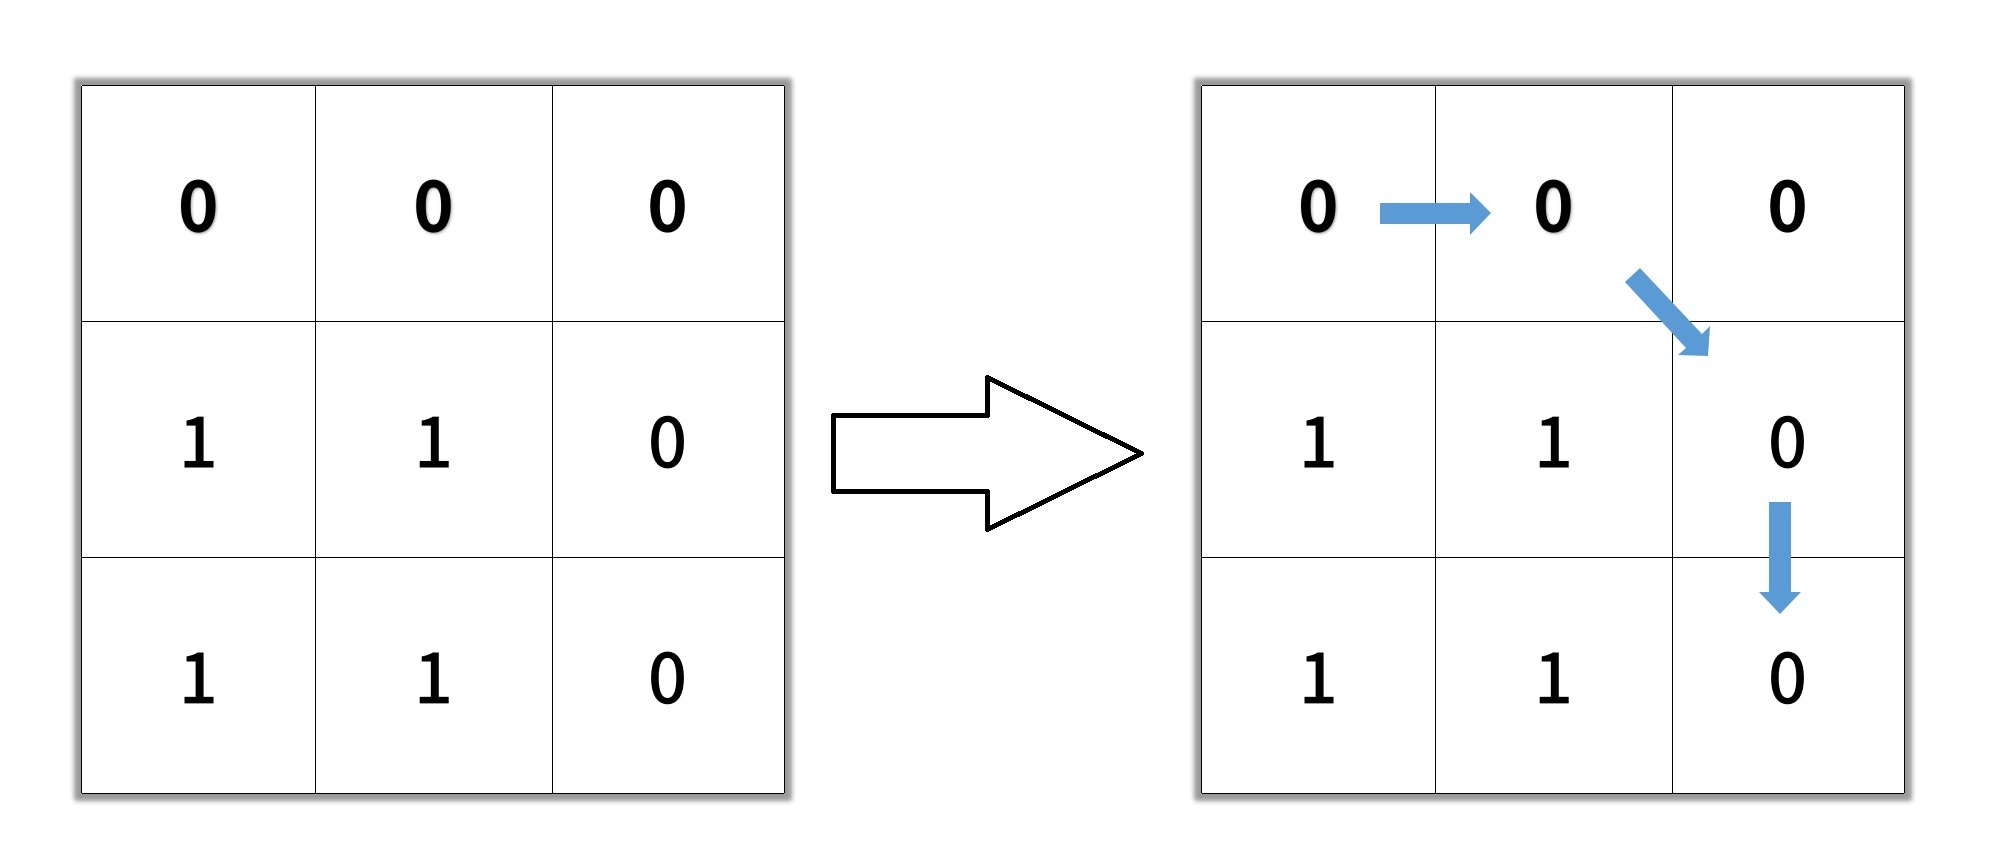


    - Input: grid = [[0,0,0],[1,1,0],[1,1,0]]
    - Output: 4
- Example 3:

    - Input: grid = [[1,0,0],[1,1,0],[1,1,0]]
    - Output: -1
 

- Constraints:

    - n == grid.length
    - n == grid[i].length
    - 1 <= n <= 100
    - grid[i][j] is 0 or 1

In [ ]:
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:

        mr = len(grid) - 1
        mc = len(grid[0]) - 1

        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

        def get_n(x, y):
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if not(0 <= nx <= mr and 0 <= ny <= mc):
                    continue
                if grid[nx][ny] != 0:
                    continue
                yield (nx, ny)

        if grid[0][0] != 0 or grid[mr][mc] != 0:
            return -1

        queue = deque()
        queue.append((0, 0))
        grid[0][0] = 1

        while queue:
            x, y = queue.popleft()
            distance = grid[x][y]
            if (x, y) == (mr, mc):
                return distance
            for nr, nc in get_n(x, y):
                grid[nr][nc] = distance + 1
                queue.append((nr, nc))
        return -1


**Problem4-Leetcode#994. Rotting Oranges-Medium**

You are given an m x n grid where each cell can have one of three values:

- 0 representing an empty cell,
- 1 representing a fresh orange, or
- 2 representing a rotten orange.
Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.

 

- Example 1:

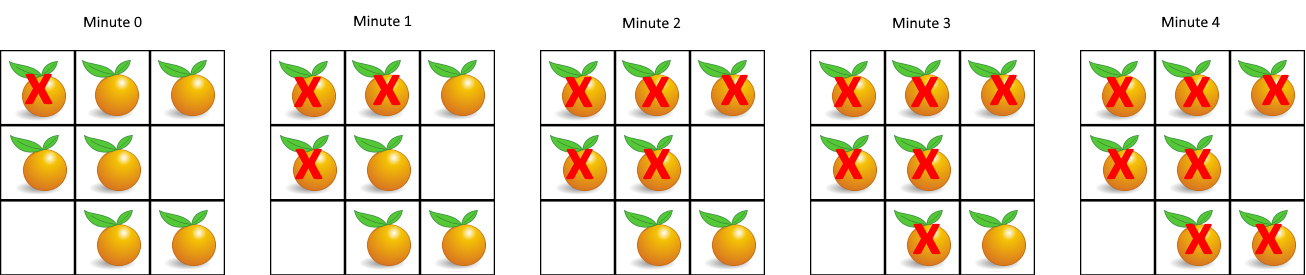

    - Input: grid = [[2,1,1],[1,1,0],[0,1,1]]
    - Output: 4

- Example 2:

    - Input: grid = [[2,1,1],[0,1,1],[1,0,1]]
    - Output: -1
    - Explanation: The orange in the bottom left corner (row 2, column 0) is never rotten, because rotting only happens 4-directionally.

- Example 3:

    - Input: grid = [[0,2]]
    - Output: 0
    - Explanation: Since there are already no fresh oranges at minute 0, the answer is just 0.
 

In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        if not grid:
            return 0

        r = len(grid)
        c = len(grid[0])
        queue = deque()

        fresh = 0

        for i in range(r):
            for j in range(c):
                if grid[i][j] == 2:
                    queue.append((i, j))
                elif grid[i][j] == 1:
                    fresh += 1

        if fresh == 0:
            return 0

        def bfs():
            nonlocal fresh
            minutes = 0
            directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
            while queue:
                minutes += 1
                for _ in range(len(queue)):
                    x, y = queue.popleft()
                    for dx, dy in directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < r and 0 <= ny < c and grid[nx][ny] == 1:
                            grid[nx][ny] = 2
                            fresh -= 1
                            queue.append((nx, ny))
            return minutes

        minutes = bfs()

        return minutes - 1 if fresh == 0 else -1


**Problem5-Leetcode#133. Clone Graph-Medium**

Given a reference of a node in a connected undirected graph.\

Return a deep copy (clone) of the graph.\

Each node in the graph contains a value (int) and a list (List[Node]) of its neighbors.\

class Node {\
    public int val;\
    public List<Node> neighbors;\
}
 

Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed).\
    For example, the first node with val == 1, the second node with val == 2, and so on.\
    The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. \
    Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with val = 1.\
    You must return the copy of the given node as a reference to the cloned graph.

 

- Example 1:
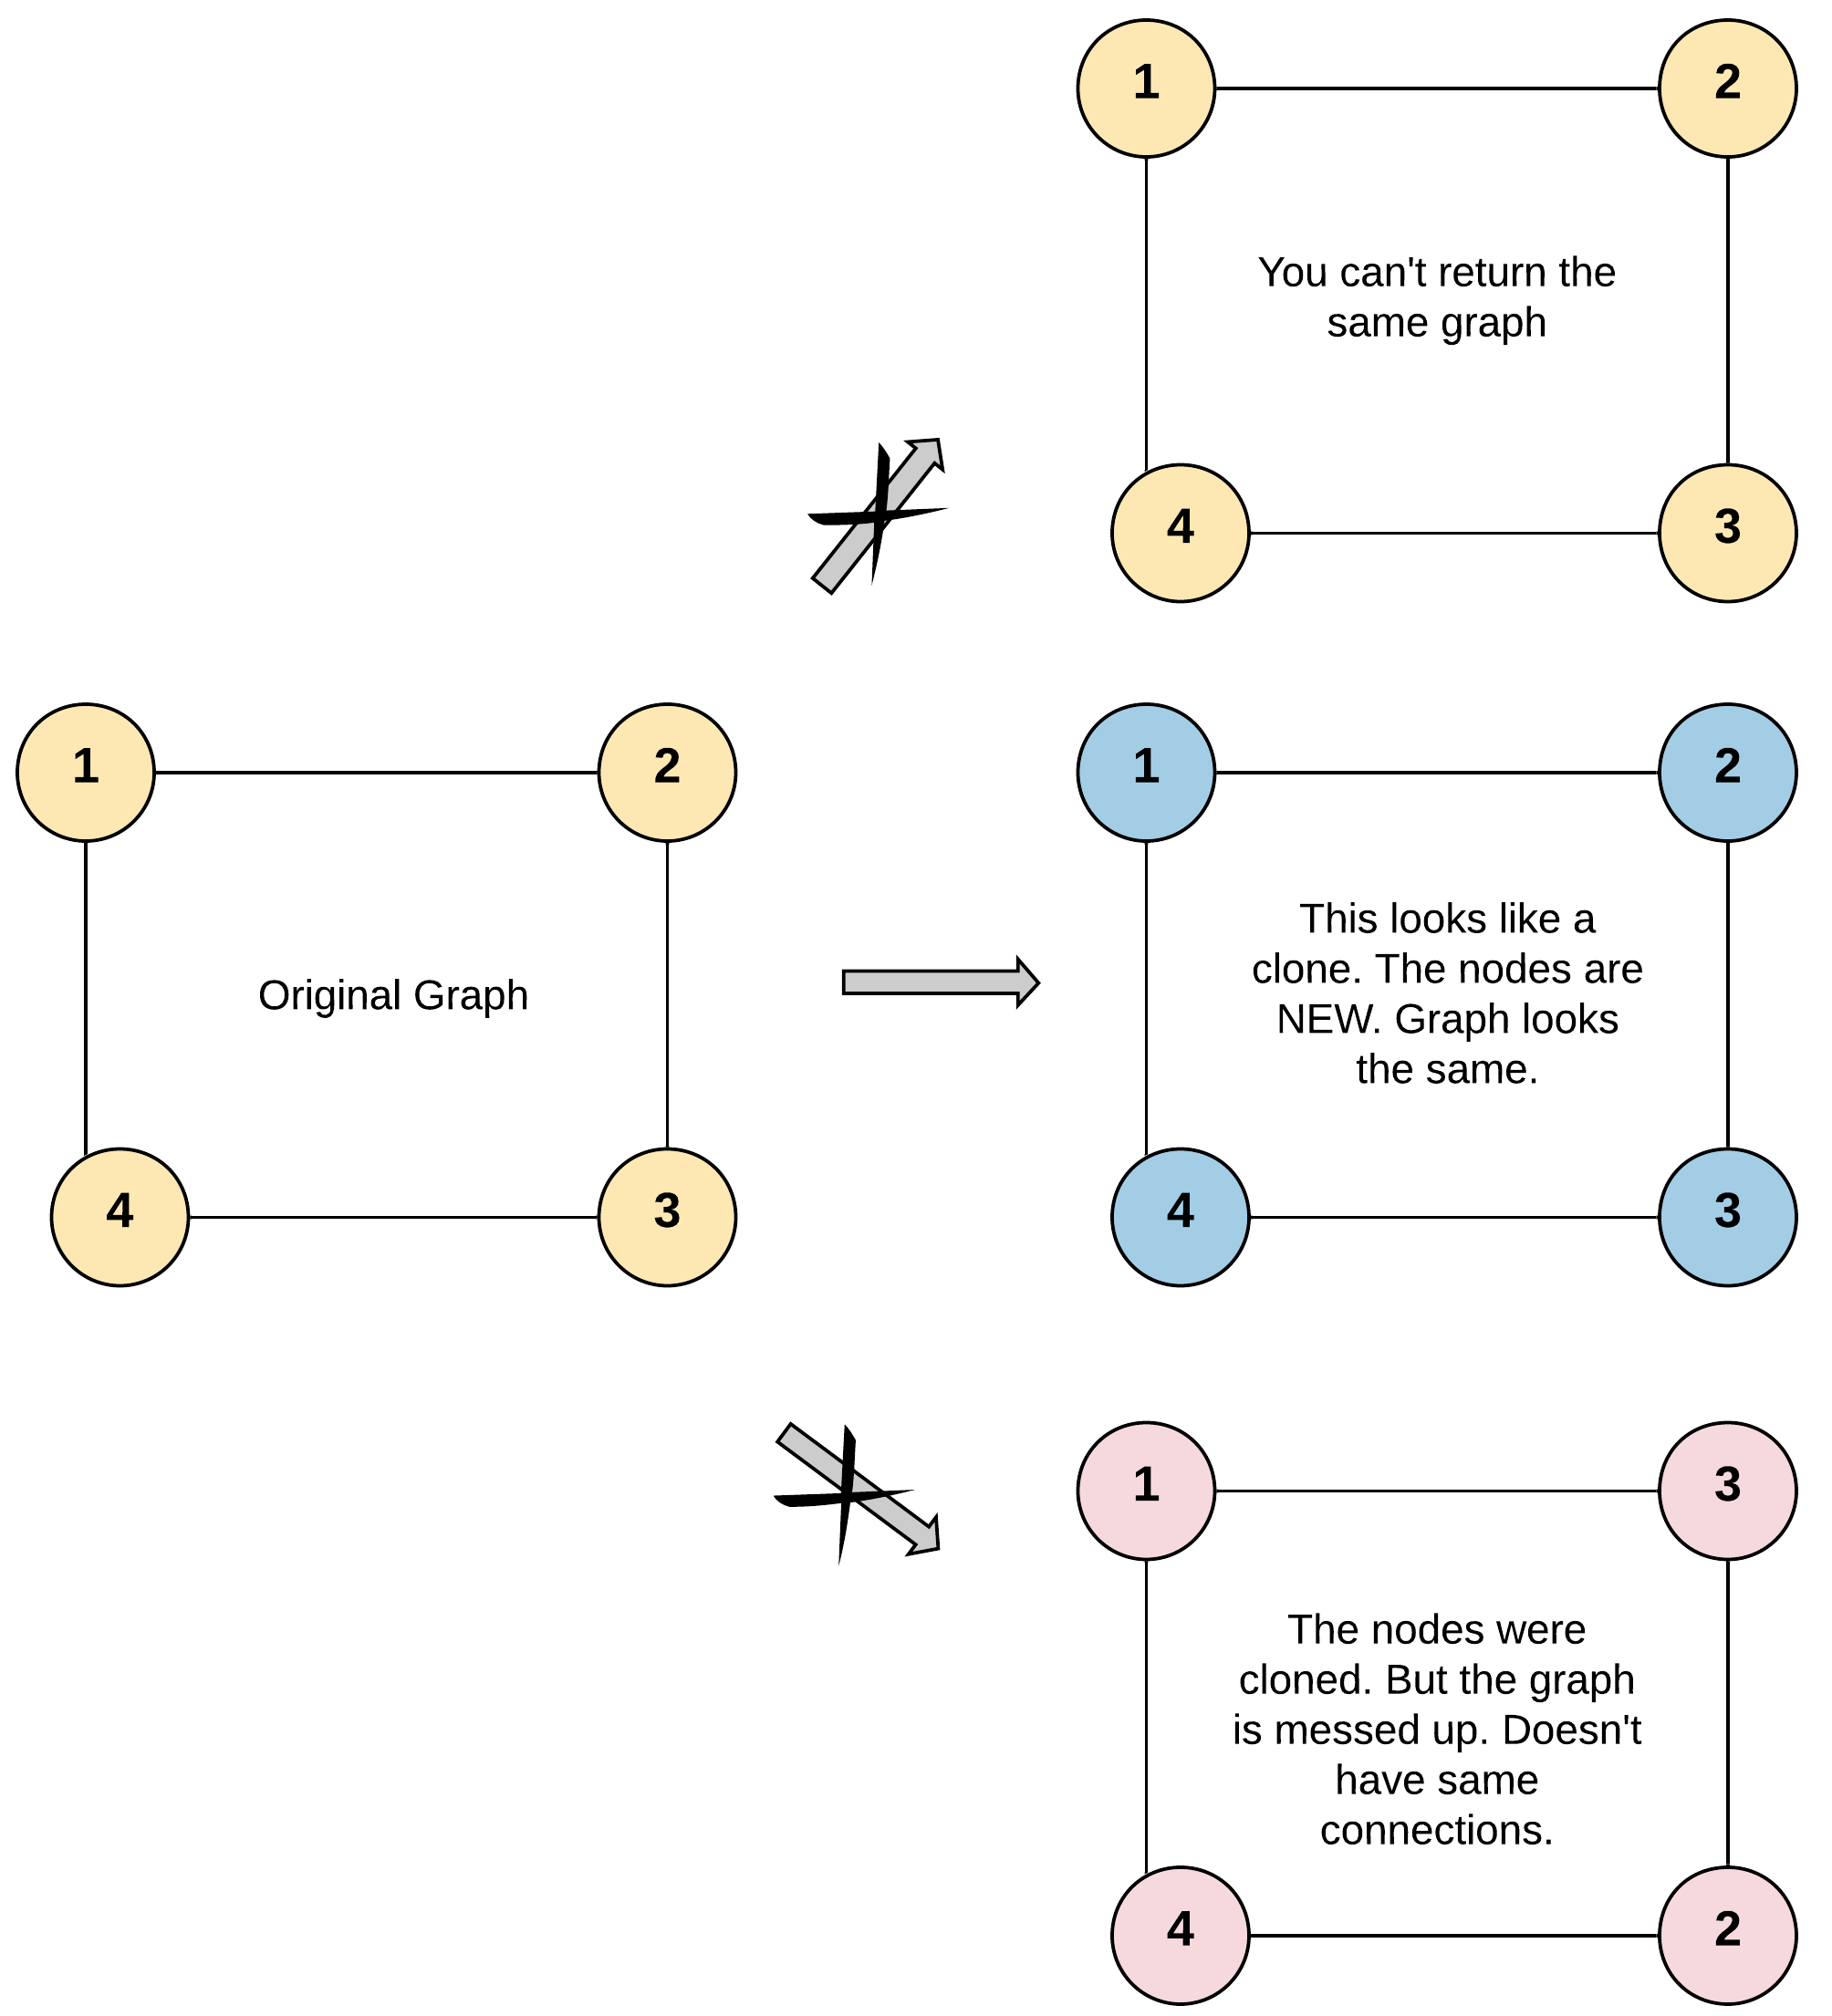  
    
    - Input: adjList = [[2,4],[1,3],[2,4],[1,3]]
    - Output: [[2,4],[1,3],[2,4],[1,3]]
    - Explanation: There are 4 nodes in the graph.
    
1st node (val = 1)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).\
2nd node (val = 2)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).\
3rd node (val = 3)'s neighbors are 2nd node (val = 2) and 4th node (val = 4).\
4th node (val = 4)'s neighbors are 1st node (val = 1) and 3rd node (val = 3).\
    
- Example 2: 
    
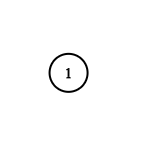
    
    - Input: adjList = [[]]
    - Output: [[]]
    - Explanation: Note that the input contains one empty list. The graph consists of only one node with val = 1 and it does not have any neighbors.

- Example 3:

    - Input: adjList = []
    - Output: []
    - Explanation: This an empty graph, it does not have any nodes.
 

- Constraints:

    - The number of nodes in the graph is in the range [0, 100].
    - 1 <= Node.val <= 100
    - Node.val is unique for each node.
    - There are no repeated edges and no self-loops in the graph.
    - The Graph is connected and all nodes can be visited starting from the given node.
   


In [ ]:
from typing import Optional
class Solution:
    def __init__(self):
        self.visited = {}

    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        if not node:
            return node

        if node in self.visited:
            return self.visited[node]

        clone_node = Node(node.val, [])

        self.visited[node] = clone_node

        if node.neighbors:
            clone_node.neighbors = [self.cloneGraph(n) for n in node.neighbors]

        return clone_node


**Problem6-Leetcode#207. Course Schedule-Medium**

There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1.\
You are given an array prerequisites where prerequisites[i] = [ai, bi] \
indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.\
Return true if you can finish all courses. Otherwise, return false.

 

  - Example 1:

    - Input: numCourses = 2, prerequisites = [[1,0]]
    - Output: true
    - Explanation: There are a total of 2 courses to take. \
      To take course 1 you should have finished course 0. So it is possible.

- Example 2:

    - Input: numCourses = 2, prerequisites = [[1,0],[0,1]]
    - Output: false
    - Explanation: There are a total of 2 courses to take. \
      To take course 1 you should have finished course 0,\
      and to take course 0 you should also have finished course 1. So it is impossible.
 

- Constraints:

    - 1 <= numCourses <= 2000
    - 0 <= prerequisites.length <= 5000
    - prerequisites[i].length == 2
    - 0 <= ai, bi < numCourses
    - All the pairs prerequisites[i] are unique.

In [ ]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        def dfs(course, visit, adjList):
            if course in visit:
                return False
            if adjList[course] == []:
                return True

            visit.add(course)

            for neighbor in adjList[course]:
                if not dfs(neighbor, visit, adjList):
                    return False

            visit.remove(course)
            adjList[course] = []
            return True

        adjList = [[] for _ in range(numCourses)]
        for course, prereq in prerequisites:
            adjList[prereq].append(course)

        visit = set()

        for c in range(numCourses):
            if not dfs(c, visit, adjList):
                return False
        return True
